In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Lorenz system
def lorenz(t, y, sigma=10, rho=28, beta=8/3):
    return [-sigma*y[0] + sigma*y[1],
            -y[0]*y[2] + rho*y[0] - y[1],
            y[0]*y[1] - beta*y[2]]

# RK4 method implementation
def rk4(f, tspan, y0, h):
    t = np.arange(tspan[0], tspan[1], h)
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        k1 = np.array(f(t[i-1], y[:, i-1]))
        k2 = np.array(f(t[i-1] + h/2, y[:, i-1] + h/2 * k1))
        k3 = np.array(f(t[i-1] + h/2, y[:, i-1] + h/2 * k2))
        k4 = np.array(f(t[i-1] + h, y[:, i-1] + h * k3))
        y[:, i] = y[:, i-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, y


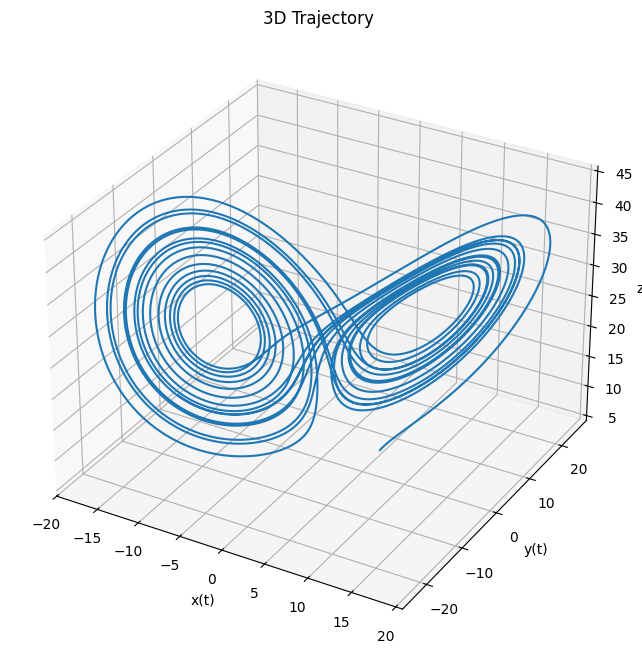

In [9]:
# Question (a)
tspan = [0, 20]
r0 = [5, 5, 5]
h = 1e-3

# Solve using RK4
t, r = rk4(lorenz, tspan, r0, h)

# 3D trajectory
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(r[0, :], r[1, :], r[2, :])
ax1.set_xlabel('x(t)')
ax1.set_ylabel('y(t)')
ax1.set_zlabel('z(t)')
plt.title('3D Trajectory')
plt.show()


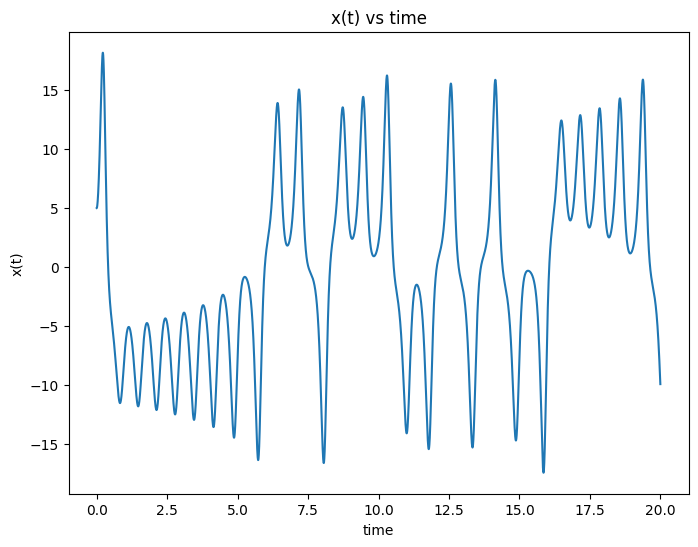

In [10]:
# x position
fig2 = plt.figure(figsize=(8,6))
plt.plot(t, r[0, :])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('x(t) vs time')
plt.show()

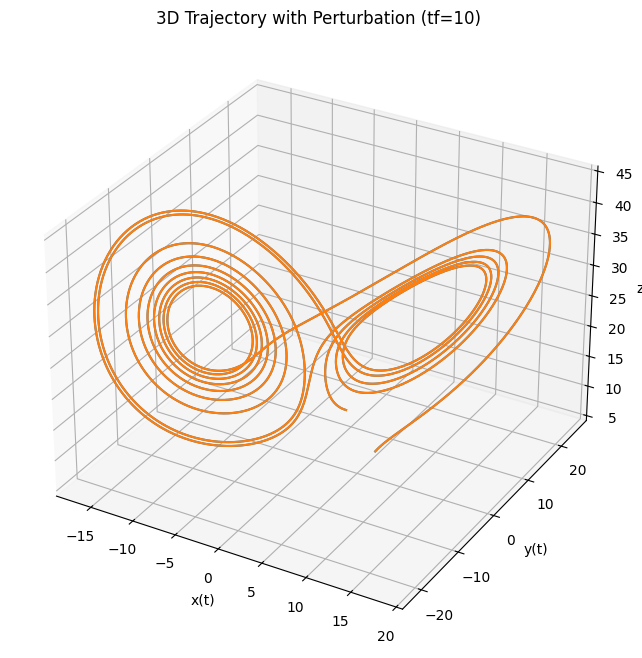

In [11]:
# Question (b)
p = [1e-5, -2.1e-5, 0]  # perturbation

# tf = 10
tspan = [0, 10]
_, r = rk4(lorenz, tspan, r0, h)
_, rp = rk4(lorenz, tspan, np.array(r0) + np.array(p), h)

# 3D trajectory
fig11 = plt.figure(figsize=(8,8))
ax11 = fig11.add_subplot(111, projection='3d')
ax11.plot(r[0, :], r[1, :], r[2, :])
ax11.plot(rp[0, :], rp[1, :], rp[2, :])
ax11.set_xlabel('x(t)')
ax11.set_ylabel('y(t)')
ax11.set_zlabel('z(t)')
plt.title('3D Trajectory with Perturbation (tf=10)')
plt.show()


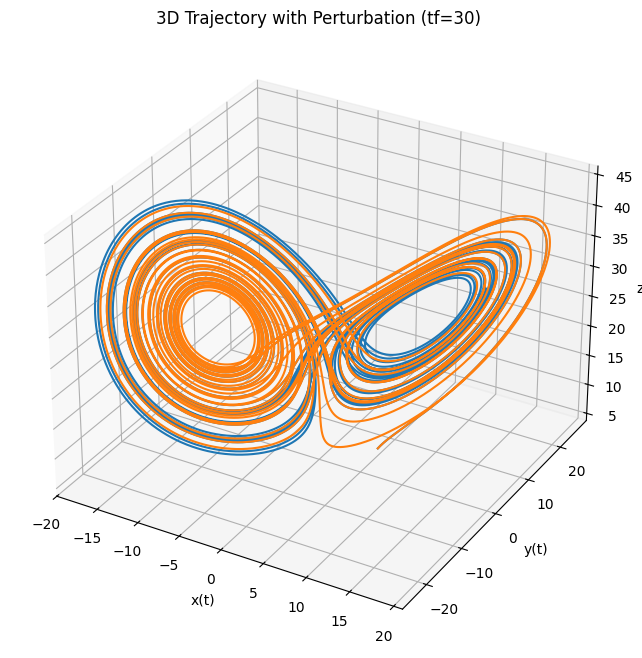

In [12]:
# tf = 30
tspan = [0, 30]
t, r = rk4(lorenz, tspan, r0, h)
tp, rp = rk4(lorenz, tspan, np.array(r0) + np.array(p), h)

# 3D trajectory
fig12 = plt.figure(figsize=(8,8))
ax12 = fig12.add_subplot(111, projection='3d')
ax12.plot(r[0, :], r[1, :], r[2, :])
ax12.plot(rp[0, :], rp[1, :], rp[2, :])
ax12.set_xlabel('x(t)')
ax12.set_ylabel('y(t)')
ax12.set_zlabel('z(t)')
plt.title('3D Trajectory with Perturbation (tf=30)')
plt.show()


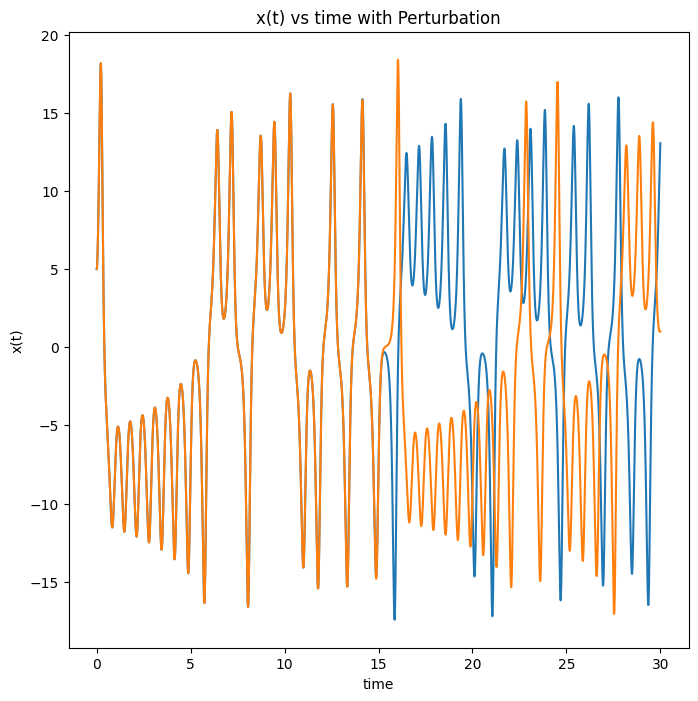

In [13]:
# x position
fig22 = plt.figure(figsize=(8,8))
plt.plot(t, r[0, :])
plt.plot(tp, rp[0, :])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('x(t) vs time with Perturbation')
plt.show()

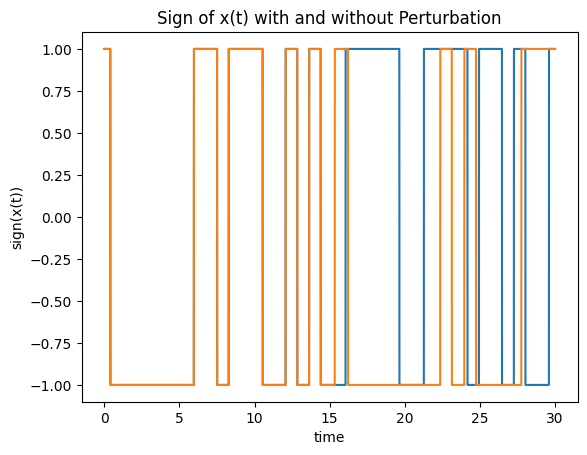

In [14]:
# Question (c)
x_sign = np.sign(r[0, :])
xp_sign = np.sign(rp[0, :])

fig101 = plt.figure(101)
plt.plot(t, x_sign)
plt.plot(t, xp_sign)
plt.xlabel('time')
plt.ylabel('sign(x(t))')
plt.title('Sign of x(t) with and without Perturbation')

plt.show()